# Battle of Neighborhoods

## United Kingdom

In [ ]:
### import neccessary libraries

In [98]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [99]:
### import data
data = pd.read_excel('IMDrank.xlsx')
data

,Town,Region/Country,Median Housr Price,IMD rank,Income Deprivation Rank,Employment Deprivation Rank,Health Deprivation and Disability Rank,"Education, Skills and Training Deprivation Rank",Crime Rank,Barriers to Housing and Services Rank,Living Environment Deprivation Rank
0,Barnsley,Yorkshire and The Humber,106000.0,30,37,35,26,16,59,95,86
1,Basildon,East of England,181000.0,35,21,37,80,1,4,5,99
2,Basingstoke,South East,226000.0,106,106,99,103,68,87,59,100
3,Bath,South West,285000.0,88,92,87,83,94,98,68,68
4,Bedford,East of England,190000.0,66,48,53,74,58,75,12,45
...,...,...,...,...,...,...,...,...,...,...,...
103,Woking,South East,329975.0,104,102,103,109,105,100,54,98
104,Wolverhampton,West Midlands,130000.0,25,17,17,51,29,61,37,57
105,Worcester,West Midlands,176000.0,71,73,75,73,79,67,18,34
106,Worthing,South East,240000.0,92,104,90,81,99,91,109,42


In [100]:
### drop unneccessary columns
df = data[['Town','IMD rank', 'Median Housr Price']]
df.head()

,Town,IMD rank,Median Housr Price
0,Barnsley,30,106000.0
1,Basildon,35,181000.0
2,Basingstoke,106,226000.0
3,Bath,88,285000.0
4,Bedford,66,190000.0


# Exploring Data

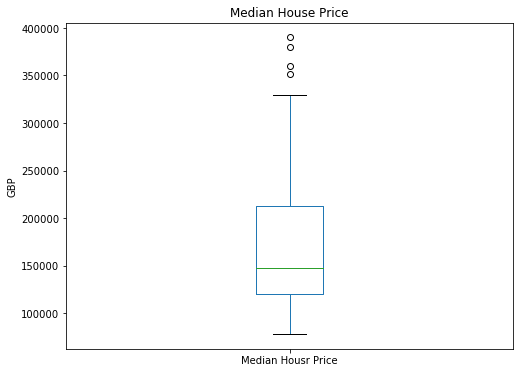

In [101]:
# exploring Median House Price
# to get a dataframe
df_price = df[['Town','Median Housr Price']]
df_price.plot(kind='box', figsize=(8, 6))
import matplotlib.pyplot as plt
plt.title('Median House Price')
plt.ylabel('GBP')

plt.show()

In [102]:
# Plot top 5 Town with cheapest prices
df_cheap_price= df_price.sort_values(by='Median Housr Price', ascending=True)
df_cheap_price = df_cheap_price.head(5)
df_cheap_price


,Town,Median Housr Price
15,Burnley,78000.0
65,Oldham,95000.0
38,Halifax,100000.0
12,Bradford,100000.0
91,Stoke-on-Trent,101950.0


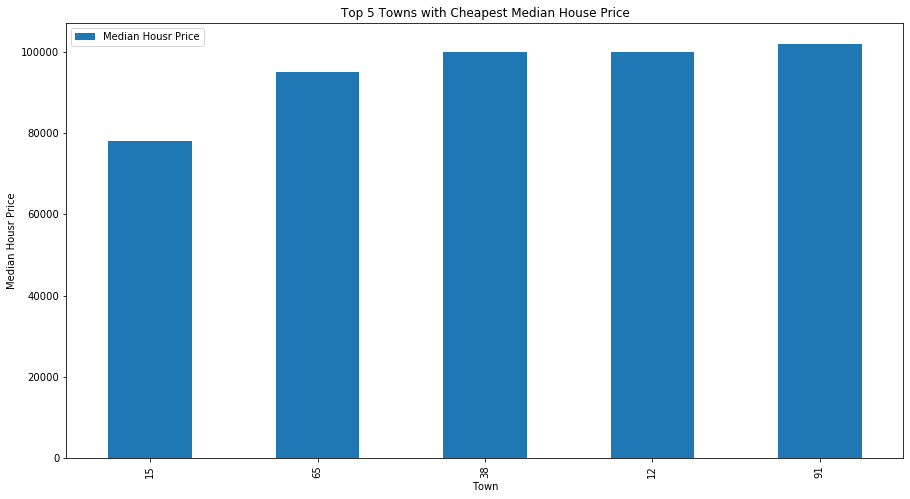

In [103]:
df_cheap_price.plot(kind='bar', figsize=(15, 8),tick_label=labels)

plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('Median Housr Price') # add y-label to the plot
plt.title('Top 5 Towns with Cheapest Median House Price') # add title to the plotax.set_xticks(ind)
plt.show()

In [90]:
# Plot top 5 Town with most expensive prices
df_pricey_price= df_price.sort_values(by='Median Housr Price', ascending=False)
df_pricey_price = df_pricey_price.head(5)
df_pricey_price

,Town,Median Housr Price
86,St Albans,390000.0
52,London,380000.0
18,Cambridge,360000.0
37,Guildford,352000.0
103,Woking,329975.0


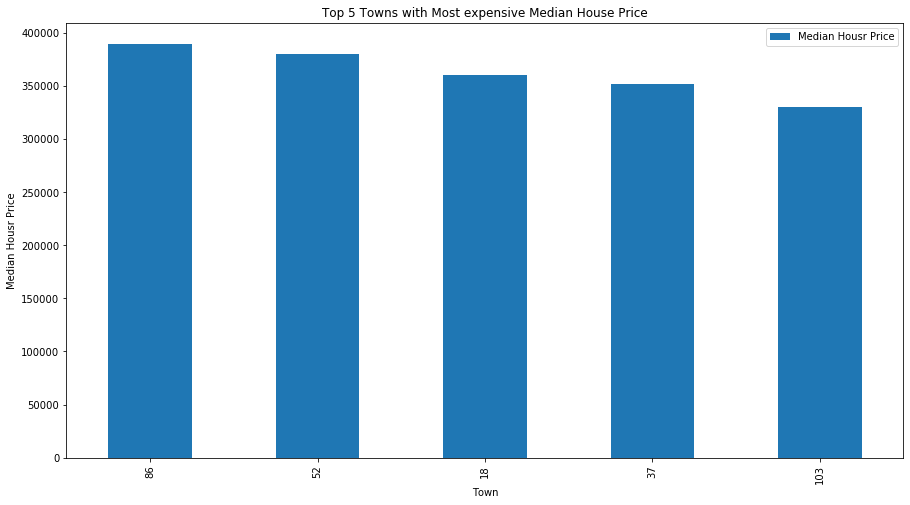

In [91]:
df_pricey_price.plot(kind='bar', figsize=(15, 8),tick_label=labels)

plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('Median Housr Price') # add y-label to the plot
plt.title('Top 5 Towns with Most expensive Median House Price') # add title to the plotax.set_xticks(ind)
plt.show()

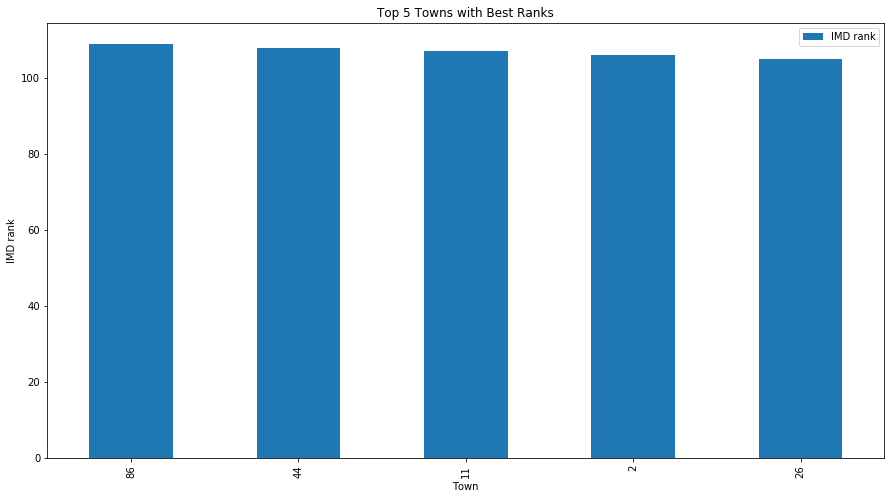

In [92]:
# top 5 Towns with best IMD rank
df_rank = df[['Town','IMD rank']]
df_best_rank= df_rank.sort_values(by='IMD rank', ascending=False)
df_best_rank = df_best_rank.head(5)
df_best_rank.plot(kind='bar', figsize=(15, 8),tick_label=labels)

plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('IMD rank') # add y-label to the plot
plt.title('Top 5 Towns with Best Ranks') # add title to the plotax.set_xticks(ind)
plt.show()

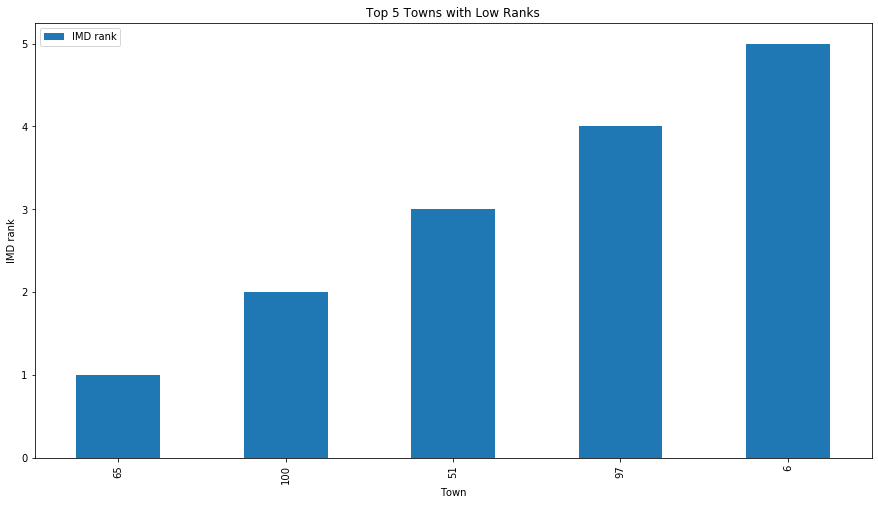

In [93]:
# top 5 Towns with low IMD rank
df_rank = df[['Town','IMD rank']]
df_low_rank= df_rank.sort_values(by='IMD rank', ascending=True)
df_low_rank = df_low_rank.head(5)
df_low_rank.plot(kind='bar', figsize=(15, 8),tick_label=labels)

plt.xlabel('Town') # add to x-label to the plot
plt.ylabel('IMD rank') # add y-label to the plot
plt.title('Top 5 Towns with Low Ranks') # add title to the plotax.set_xticks(ind)
plt.show()

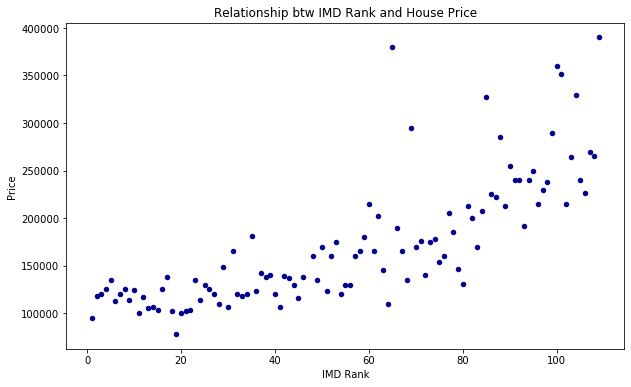

In [94]:
# plot relationship between Median House Price and IMD rank
df.plot(kind='scatter', x='IMD rank', y='Median Housr Price', figsize=(10, 6), color='darkblue')

plt.title('Relationship btw IMD Rank and House Price')
plt.xlabel('IMD Rank')
plt.ylabel('Price')

plt.show()

# Exporing neiborhoods

In [104]:
# get district's location
latitude = np.zeros(data.shape[0])
longitude = np.zeros(data.shape[0])

geolocator = Nominatim(user_agent="uk_explorer")

for idx in range(data.shape[0]):
    address = df['Town'].loc[idx] + ', United Kingdom'
    
    location = geolocator.geocode(address)
    latitude[idx] = location.latitude
    longitude[idx] = location.longitude

In [105]:
df1=df
df1['Latitude'] = latitude
df1['Longitude'] = longitude
df1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Town,IMD rank,Median Housr Price,Latitude,Longitude
0,Barnsley,30,106000.0,53.552772,-1.482776
1,Basildon,35,181000.0,51.575460,0.475736
2,Basingstoke,106,226000.0,51.262826,-1.086198
3,Bath,88,285000.0,51.381386,-2.359696
4,Bedford,66,190000.0,52.136381,-0.467504
...,...,...,...,...,...
103,Woking,104,329975.0,51.320189,-0.556473
104,Wolverhampton,25,130000.0,52.584765,-2.127567
105,Worcester,71,176000.0,52.191185,-2.220658
106,Worthing,92,240000.0,50.811690,-0.370395


In [44]:
# Get UK location
address = 'United Kingdom'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the UK are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the UK are 54.7023545, -3.2765753.


In [48]:
# create map of the UK using latitude and longitude values
map_UK = folium.Map(location=[54.7023545,-3.2765753], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Town']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='#E0548F',
        fill_opacity=0.7,
        parse_html=False).add_to(map_UK)
map_UK

In [49]:
#Get trending venues
CLIENT_ID = 'CM5LQGTK3VXIITFPCNIJ5L1W1RQGCP4HAJOTCBFLK4JGBNNU' # your Foursquare ID
CLIENT_SECRET = '3TBJDEGLTNTVMEC5KKLFAHCZMIV4CDR0J3ZNNWFPLX1XF5PO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CM5LQGTK3VXIITFPCNIJ5L1W1RQGCP4HAJOTCBFLK4JGBNNU
CLIENT_SECRET:3TBJDEGLTNTVMEC5KKLFAHCZMIV4CDR0J3ZNNWFPLX1XF5PO


In [50]:
df.loc[0, 'Town']

'Barnsley'

In [51]:
Town_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
Town_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

Town_name = data.loc[0, 'Town'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Town_name, 
                                                               Town_latitude, 
                                                               Town_longitude))

Latitude and longitude values of Barnsley are 53.5527719, -1.4827755.


In [52]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Town_latitude, 
    Town_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=CM5LQGTK3VXIITFPCNIJ5L1W1RQGCP4HAJOTCBFLK4JGBNNU&client_secret=3TBJDEGLTNTVMEC5KKLFAHCZMIV4CDR0J3ZNNWFPLX1XF5PO&v=20180605&ll=53.5527719,-1.4827755&radius=500&limit=100'

In [54]:
import requests # library to handle requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed6bf593907e7001b7a8467'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Barnsley',
  'headerFullLocation': 'Barnsley',
  'headerLocationGranularity': 'city',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': 53.557271904500006,
    'lng': -1.4752149252619207},
   'sw': {'lat': 53.5482718955, 'lng': -1.4903360747380794}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53d63784498e9cdf12979c9b',
       'name': 'Backyard BBQ',
       'location': {'address': 'The Arcade',
        'lat': 53.55338286227971,
        'lng': -1.48077489859527,
        'labeledLatLngs': [{'label': 'display',
          'lat': 53.55338286227971,
          'lng'

In [55]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [56]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Backyard BBQ,BBQ Joint,53.553383,-1.480775
1,Old No.7,Pub,53.553217,-1.481774
2,Costa Coffee,Coffee Shop,53.552519,-1.480454
3,Lidl,Supermarket,53.551849,-1.485044
4,The Glasshouse,Hotel Bar,53.553456,-1.487060


In [57]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

28 venues were returned by Foursquare.


In [58]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [59]:
UK_venues = getNearbyVenues(names=df['Town'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Barnsley
Basildon
Basingstoke
Bath
Bedford
Birkenhead
Birmingham
Blackburn
Blackpool
Bolton
Bournemouth
Bracknell
Bradford
Brighton and Hove
Bristol
Burnley
Burton upon Trent
Bury
Cambridge
Carlisle  
Chelmsford  
Cheltenham  
Chester  
Chesterfield  
Colchester  
Coventry  
Crawley  
Darlington  
Derby  
Doncaster  
Dudley
Eastbourne  
Exeter  
Gateshead  
Gillingham  
Gloucester  
Grimsby  
Guildford  
Halifax  
Harlow  
Harrogate  
Hartlepool  
Hastings  
Hemel Hempstead  
High Wycombe  
Huddersfield  
Ipswich  
Kingston upon Hull  
Leeds  
Leicester  
Lincoln  
Liverpool  
London
Luton  
Maidstone  
Manchester  
Mansfield  
Middlesbrough  
Milton Keynes  
Newcastle upon Tyne  
Newcastle-under-Lyme  
Northampton  
Norwich  
Nottingham  
Nuneaton  
Oldham  
Oxford  
Peterborough  
Plymouth  
Poole  
Portsmouth  
Preston  
Reading  
Redditch  
Rochdale  
Rotherham  
Salford  
Scunthorpe  
Sheffield  
Shrewsbury  
Slough  
Solihull  
South Shields  
Southampton  
Southend-on-Sea  
Sout

In [60]:
print(UK_venues.shape)
UK_venues

(5286, 7)


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barnsley,53.552772,-1.482776,Backyard BBQ,53.553383,-1.480775,BBQ Joint
1,Barnsley,53.552772,-1.482776,Old No.7,53.553217,-1.481774,Pub
2,Barnsley,53.552772,-1.482776,Costa Coffee,53.552519,-1.480454,Coffee Shop
3,Barnsley,53.552772,-1.482776,Lidl,53.551849,-1.485044,Supermarket
4,Barnsley,53.552772,-1.482776,The Glasshouse,53.553456,-1.487060,Hotel Bar
...,...,...,...,...,...,...,...
5281,York,53.959055,-1.081536,Lamb & Lion Inn,53.962846,-1.085193,Pub
5282,York,53.959055,-1.081536,The Judges Lodging,53.960547,-1.085556,Hotel
5283,York,53.959055,-1.081536,Thomas's of York,53.961132,-1.085600,Pub
5284,York,53.959055,-1.081536,ASK Italian,53.961082,-1.084850,Italian Restaurant


# One hot Encoding

In [61]:
# one hot encoding
UK_onehot = pd.get_dummies(UK_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
UK_onehot['Town'] = UK_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [UK_onehot.columns[-1]] + list(UK_onehot.columns[:-1])
UK_onehot = UK_onehot[fixed_columns]

UK_onehot.head()

,Town,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Zoo
0,Barnsley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barnsley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barnsley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barnsley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barnsley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
UK_onehot.shape

(5286, 253)

In [63]:
UK_grouped = UK_onehot.groupby('Town').mean().reset_index()
UK_grouped

,Town,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Zoo
0,Barnsley,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.035714,0.0,0.000000,0.0,0.0,0.000000,0.0
1,Basildon,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Basingstoke,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.026316,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,Bath,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.037037,0.000000,0.018519,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Bedford,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Woking,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.025000,0.0,...,0.000000,0.025000,0.000000,0.000000,0.0,0.025000,0.0,0.0,0.000000,0.0
104,Wolverhampton,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.016949,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.016949,0.0,0.0,0.016949,0.0
105,Worcester,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.022989,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.011494,0.0
106,Worthing,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,...,0.000000,0.020833,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [64]:
num_top_venues = 5

for hood in UK_grouped['Town']:
    print("----"+hood+"----")
    temp = UK_grouped[UK_grouped['Town'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barnsley----
            venue  freq
0             Pub  0.14
1             Bar  0.11
2  Clothing Store  0.11
3     Supermarket  0.07
4  Sandwich Place  0.07


----Basildon----
               venue  freq
0  Convenience Store  0.50
1               Lake  0.25
2  Indian Restaurant  0.25
3   Pedestrian Plaza  0.00
4               Park  0.00


----Basingstoke----
                venue  freq
0         Coffee Shop  0.11
1      Clothing Store  0.11
2      Sandwich Place  0.08
3                Café  0.05
4  Italian Restaurant  0.03


----Bath----
           venue  freq
0    Coffee Shop  0.07
1            Pub  0.06
2   Cocktail Bar  0.06
3            Bar  0.04
4  Deli / Bodega  0.04


----Bedford----
                venue  freq
0                 Pub  0.10
1         Coffee Shop  0.10
2      Clothing Store  0.06
3  Italian Restaurant  0.04
4      Sandwich Place  0.04


----Birkenhead----
                    venue  freq
0                     Pub  0.12
1           Train Station  0.12
2  Furniture

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
town_venues_sorted = pd.DataFrame(columns=columns)
town_venues_sorted['Town'] = UK_grouped['Town']

for ind in np.arange(UK_grouped.shape[0]):
    town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(UK_grouped.iloc[ind, :], num_top_venues)

town_venues_sorted.head()

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnsley,Pub,Clothing Store,Bar,Supermarket,Sandwich Place,Hotel,Department Store,Fast Food Restaurant,Pizza Place,Bookstore
1,Basildon,Convenience Store,Lake,Indian Restaurant,Hotel Bar,Hotel,Food,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant
2,Basingstoke,Clothing Store,Coffee Shop,Sandwich Place,Café,Burger Joint,Snack Place,Electronics Store,Pharmacy,Boutique,Pub
3,Bath,Coffee Shop,Pub,Cocktail Bar,Seafood Restaurant,Tea Room,Bar,Hotel,Deli / Bodega,Theater,Vegetarian / Vegan Restaurant
4,Bedford,Coffee Shop,Pub,Clothing Store,Sandwich Place,Hotel,Italian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Steakhouse,Bar


In [75]:
# set number of clusters
kclusters = 5
UK_grouped_clustering = UK_grouped.drop('Town', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(UK_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 3, 0, 3, 0, 0, 4, 0, 3], dtype=int32)

In [118]:
# add clustering labels
#town_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

UK_merged = df1

# merge UK_grouped with UK data to add latitude/longitude for each neighborhood
UK_merged = UK_merged.join(town_venues_sorted.set_index('Town'), on='Town')

UK_merged.head(100) 

,Town,IMD rank,Median Housr Price,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnsley,30,106000.0,53.552772,-1.482776,3,Pub,Clothing Store,Bar,Supermarket,Sandwich Place,Hotel,Department Store,Fast Food Restaurant,Pizza Place,Bookstore
1,Basildon,35,181000.0,51.575460,0.475736,2,Convenience Store,Lake,Indian Restaurant,Hotel Bar,Hotel,Food,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant
2,Basingstoke,106,226000.0,51.262826,-1.086198,3,Clothing Store,Coffee Shop,Sandwich Place,Café,Burger Joint,Snack Place,Electronics Store,Pharmacy,Boutique,Pub
3,Bath,88,285000.0,51.381386,-2.359696,0,Coffee Shop,Pub,Cocktail Bar,Seafood Restaurant,Tea Room,Bar,Hotel,Deli / Bodega,Theater,Vegetarian / Vegan Restaurant
4,Bedford,66,190000.0,52.136381,-0.467504,3,Coffee Shop,Pub,Clothing Store,Sandwich Place,Hotel,Italian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Steakhouse,Bar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Telford,42,139000.0,52.678042,-2.451427,3,Clothing Store,Coffee Shop,Furniture / Home Store,Department Store,Fast Food Restaurant,Pharmacy,Bookstore,Supermarket,Shopping Plaza,American Restaurant
96,Wakefield,49,135000.0,53.682954,-1.496729,3,Coffee Shop,Clothing Store,Bar,Pub,Café,Performing Arts Venue,Hotel,Department Store,Fast Food Restaurant,Bookstore
97,Walsall,4,125000.0,52.584795,-1.982269,3,Supermarket,Sandwich Place,Coffee Shop,Pub,Fast Food Restaurant,Indian Restaurant,Bookstore,Furniture / Home Store,Pharmacy,Clothing Store
98,Warrington,63,145000.0,53.389950,-2.594318,0,Bar,Pub,Clothing Store,Coffee Shop,Pharmacy,Italian Restaurant,Café,Greek Restaurant,Discount Store,Tapas Restaurant


In [111]:
# create map
map_clusters = folium.Map(location=[54.7023545, -3.2765753], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(UK_merged['Latitude'], UK_merged['Longitude'], UK_merged['Town'], UK_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Exploring cluster

In [119]:
# Cluster 1: Commercial Towns
UK_merged.loc[UK_merged['Cluster Label'] == 0, UK_merged.columns[[0] + list(range(5, UK_merged.shape[1]))]]

,Town,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bath,0,Coffee Shop,Pub,Cocktail Bar,Seafood Restaurant,Tea Room,Bar,Hotel,Deli / Bodega,Theater,Vegetarian / Vegan Restaurant
5,Birkenhead,0,Train Station,Pub,Plaza,Coffee Shop,Bus Station,Café,Furniture / Home Store,Chinese Restaurant,Department Store,Gym
6,Birmingham,0,Coffee Shop,Hotel,Pub,Indian Restaurant,Restaurant,Beer Bar,Plaza,Bar,Italian Restaurant,Cosmetics Shop
8,Blackpool,0,Bar,Italian Restaurant,Pub,Coffee Shop,Clothing Store,Theater,Fish & Chips Shop,Arcade,Department Store,Restaurant
10,Bournemouth,0,Coffee Shop,Hotel,Bar,Park,Sandwich Place,Cocktail Bar,Pizza Place,Beach,Italian Restaurant,Burger Joint
12,Bradford,0,Hotel,Bar,Coffee Shop,Pharmacy,Pizza Place,Plaza,Pub,Clothing Store,Italian Restaurant,Movie Theater
13,Brighton and Hove,0,Pub,Platform,Hotel,Liquor Store,Rental Car Location,Historic Site,Deli / Bodega,Train Station,Grocery Store,Zoo
14,Bristol,0,Bar,Café,Pub,Coffee Shop,Italian Restaurant,Burger Joint,Indian Restaurant,Pizza Place,Asian Restaurant,Steakhouse
17,Bury,0,Pub,Coffee Shop,Clothing Store,Bar,Asian Restaurant,Café,French Restaurant,Pizza Place,Pharmacy,Thai Restaurant
18,Cambridge,0,Pub,Coffee Shop,Sandwich Place,Burger Joint,Bar,Café,Italian Restaurant,English Restaurant,Pizza Place,Thai Restaurant


In [113]:
# Cluster 2: Port Towns
UK_merged.loc[UK_merged['Cluster Label'] == 1, UK_merged.columns[[0] + list(range(5, UK_merged.shape[1]))]]

,Town,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Grimsby,1,Grocery Store,Flea Market,Shopping Plaza,Food Court,Food,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant
70,Portsmouth,1,Grocery Store,Malay Restaurant,Burger Joint,Sandwich Place,Falafel Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Farmers Market


In [114]:
# Cluster 3
UK_merged.loc[UK_merged['Cluster Label'] == 2, UK_merged.columns[[0] + list(range(5, UK_merged.shape[1]))]]

,Town,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Basildon,2,Convenience Store,Lake,Indian Restaurant,Hotel Bar,Hotel,Food,Flea Market,Fish & Chips Shop,Field,Fast Food Restaurant


In [115]:
# Cluster 4: Local Towns
UK_merged.loc[UK_merged['Cluster Label'] == 3, UK_merged.columns[[0] + list(range(5, UK_merged.shape[1]))]]

,Town,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnsley,3,Pub,Clothing Store,Bar,Supermarket,Sandwich Place,Hotel,Department Store,Fast Food Restaurant,Pizza Place,Bookstore
2,Basingstoke,3,Clothing Store,Coffee Shop,Sandwich Place,Café,Burger Joint,Snack Place,Electronics Store,Pharmacy,Boutique,Pub
4,Bedford,3,Coffee Shop,Pub,Clothing Store,Sandwich Place,Hotel,Italian Restaurant,Portuguese Restaurant,Fast Food Restaurant,Steakhouse,Bar
9,Bolton,3,Clothing Store,Pub,Coffee Shop,Pharmacy,Pizza Place,Italian Restaurant,Gastropub,Chinese Restaurant,Sandwich Place,Casino
11,Bracknell,3,Pub,Coffee Shop,Clothing Store,Hotel,Bookstore,Bakery,Pizza Place,Pharmacy,Chocolate Shop,Department Store
15,Burnley,3,Clothing Store,Pub,Coffee Shop,Supermarket,Furniture / Home Store,Pizza Place,Electronics Store,Sporting Goods Shop,Discount Store,Stationery Store
16,Burton upon Trent,3,Supermarket,Pub,Clothing Store,Café,Bookstore,Portuguese Restaurant,Furniture / Home Store,Sporting Goods Shop,Fast Food Restaurant,Movie Theater
23,Chesterfield,3,Pub,Clothing Store,Coffee Shop,Furniture / Home Store,Pharmacy,Department Store,Discount Store,Sandwich Place,Shopping Mall,Bookstore
26,Crawley,3,Breakfast Spot,Clothing Store,Café,Park,Sandwich Place,Furniture / Home Store,Theater,Department Store,Bookstore,Pub
27,Darlington,3,Pub,Coffee Shop,Hotel,Clothing Store,Italian Restaurant,Pizza Place,Pharmacy,Bookstore,Department Store,Bar


In [116]:
# Cluster 5: 
UK_merged.loc[UK_merged['Cluster Label'] == 4, UK_merged.columns[[0] + list(range(5, UK_merged.shape[1]))]]

,Town,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Blackburn,4,Clothing Store,Department Store,Supermarket,Hotel,Lawyer,Coffee Shop,Pub,Pharmacy,Sandwich Place,Shopping Mall
77,Scunthorpe,4,Clothing Store,Discount Store,Sandwich Place,Department Store,Hardware Store,Supermarket,Stationery Store,Coffee Shop,Mobile Phone Shop,Multiplex


### Recommendation

#### One when considers moving to a Town and buying a property, based on above analysis he can choose his best Town depends on his taste.
#### For example, one want to buy a house which costs no more than 200.000GBP in a commercial Town ( Cluster 1), with IMD rank not lower than 80. These are his options:

In [123]:
UK_merged.loc[(UK_merged['Median Housr Price'] < 200000) & (UK_merged['IMD rank'] >80) & (UK_merged['Cluster Label']== 0)]

,Town,IMD rank,Median Housr Price,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Shrewsbury,83,169950.0,52.707755,-2.754066,0,Pub,Café,Sandwich Place,Coffee Shop,Bar,Clothing Store,Pizza Place,Indian Restaurant,Italian Restaurant,French Restaurant
107,York,93,191150.0,53.959055,-1.081536,0,Pub,Café,Bar,Historic Site,Plaza,Coffee Shop,Cocktail Bar,French Restaurant,Italian Restaurant,Hotel
